In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fpt-ai-residency-batch-6-entry-test/sample_submission.csv
/kaggle/input/fpt-ai-residency-batch-6-entry-test/b6_test_data.csv
/kaggle/input/fpt-ai-residency-batch-6-entry-test/b6_train_data.csv
/kaggle/input/fpt-ai-residency-batch-6-entry-test/archived/archived/b6_test_data.csv
/kaggle/input/fpt-ai-residency-batch-6-entry-test/archived/archived/b6_train_data.csv


## 1. Data processing

In [2]:
train_df=pd.read_csv('/kaggle/input/fpt-ai-residency-batch-6-entry-test/b6_train_data.csv')
train_df

,task_id,question,choices,answer
0,k10168,Question: What will be output of the following...,"['8 4 2', '8 4 2', '8 4 4', '8 4 3']",C
1,k10173,Question: What will be output of the following...,"['-4', '-5', '10', '11']",A
2,k10174,Question: Match the following.\n Group 1 ...,"['P-4. Q-1, R-2, S-3', 'P-3, Q-1, R-4, S-2', '...",B
3,k10175,Question: Match the following.\nP. Regular exp...,"['P-4. Q-1, R-2, S-3', 'P-3, Q-1, R-4, S-2', '...",B
4,k10176,Question: Which grammar rules violate the requ...,"['1 only', '1 and 3 only', '2 and 3 only', '3 ...",B
...,...,...,...,...
3958,k00695,Question: Which technique is used in React Memo?,"['Hashing', 'Memoization', 'Sorting', 'Pipelin...",B
3959,k00696,Question: What is the correct definition of pr...,['Concept of passing data as props through int...,A
3960,k00697,Question: What is the correct syntax for arro...,"['()', '=>', '()=>', '>=()']",C
3961,k00698,Question: Which of the following is the correc...,"['It is a temporary storage of elements', 'It ...",B


<Axes: xlabel='answer'>

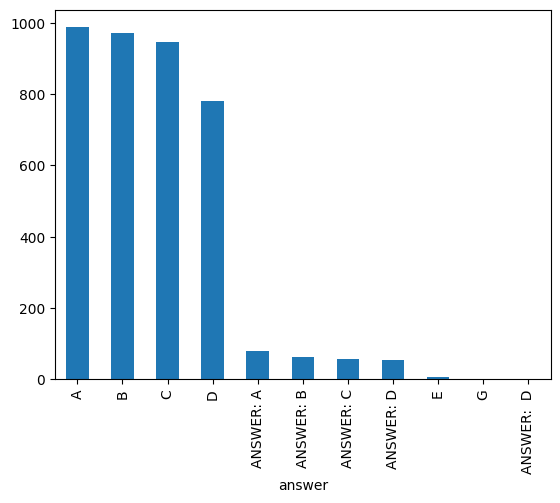

In [3]:
train_df['answer'].value_counts().plot(kind='bar')

<Axes: xlabel='answer'>

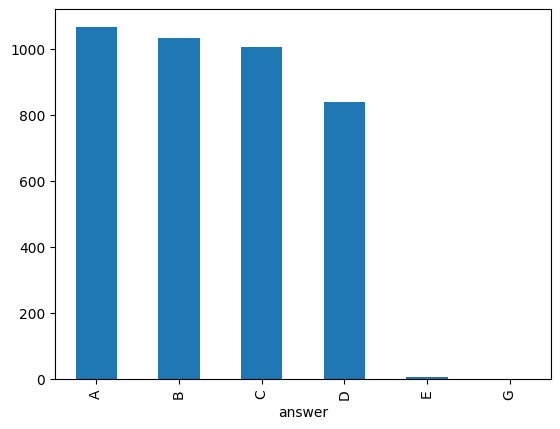

In [4]:
train_df['answer']=train_df['answer'].str.replace('ANSWER: ','').str.strip()
train_df['answer'].value_counts().plot(kind='bar')

In [5]:
train_df.isna().sum().sort_values(ascending=False)

answer      14
task_id      0
question     0
choices      0
dtype: int64

In [6]:
train_df.dropna(inplace=True)
train_df.isna().sum()

task_id     0
question    0
choices     0
answer      0
dtype: int64

In [7]:
train_df['answer'].value_counts()

answer
A    1066
B    1033
C    1004
D     838
E       7
G       1
Name: count, dtype: int64

In [8]:
#Reference: https://github.com/FSoft-AI4Code/CodeMMLU/blob/main/src/codemmlu/task_utils.py
import ast
from string import ascii_uppercase
train_df['choices'] = train_df['choices'].apply(lambda x:"\n".join([f"({ascii_uppercase[idx]}) {choice}" for idx, choice in enumerate(ast.literal_eval(x))]))

In [9]:
train_df

,task_id,question,choices,answer
0,k10168,Question: What will be output of the following...,(A) 8 4 2\n(B) 8 4 2\n(C) 8 4 4\n(D) 8 4 3,C
1,k10173,Question: What will be output of the following...,(A) -4\n(B) -5\n(C) 10\n(D) 11,A
2,k10174,Question: Match the following.\n Group 1 ...,"(A) P-4. Q-1, R-2, S-3\n(B) P-3, Q-1, R-4, S-2...",B
3,k10175,Question: Match the following.\nP. Regular exp...,"(A) P-4. Q-1, R-2, S-3\n(B) P-3, Q-1, R-4, S-2...",B
4,k10176,Question: Which grammar rules violate the requ...,(A) 1 only\n(B) 1 and 3 only\n(C) 2 and 3 only...,B
...,...,...,...,...
3958,k00695,Question: Which technique is used in React Memo?,(A) Hashing\n(B) Memoization\n(C) Sorting\n(D)...,B
3959,k00696,Question: What is the correct definition of pr...,(A) Concept of passing data as props through i...,A
3960,k00697,Question: What is the correct syntax for arro...,(A) ()\n(B) =>\n(C) ()=>\n(D) >=(),C
3961,k00698,Question: Which of the following is the correc...,(A) It is a temporary storage of elements\n(B)...,B


In [10]:
from sklearn.model_selection import train_test_split

train_df_without_G=train_df[train_df['answer']!='G']
train,validation= train_test_split(train_df_without_G, test_size=0.05,random_state=0,stratify=train_df_without_G['answer'])
train

,task_id,question,choices,answer
2610,k07973,Question: What is the output of the following ...,(A) 16\n(B) 4\n(C) 8\n(D) None of the above\n(...,B
3873,k00591,Question: What is the use of useState() hook?,(A) It allows you to have state variables in f...,A
2795,k08158,Question: Which SQL function is used to find t...,(A) AVG()\n(B) SUM()\n(C) COUNT()\n(D) MAX(),D
2212,k08920,Question: Consider the following statements:i....,(A) (ii) is true\n(B) (i) and (ii) are true\n(...,C
2866,k00845,Question: What will be the output of the follo...,(A) 25\n(B) -5\n(C) 11\n(D) 16,C
...,...,...,...,...
1443,rt03566,"Question: Given a code snippet below, which be...",(A) Compile Error\n(B) Time Limit Exceeded\n(C...,D
2636,k07999,"Question: A relation r(A,B) in a relational da...",(A) 820\n(B) 1200\n(C) 960\n(D) 1000,A
2840,k08203,"Question: What does the SQL keyword ""DISTINCT""...",(A) Filters duplicate rows from the result set...,A
2150,k08575,Question: Which of the following are component...,(A) Key\n(B) Hash Function\n(C) Hash Table\n(D...,D


In [11]:
train=pd.concat([train,train_df[train_df['answer']=='G']])

In [12]:
train

,task_id,question,choices,answer
2610,k07973,Question: What is the output of the following ...,(A) 16\n(B) 4\n(C) 8\n(D) None of the above\n(...,B
3873,k00591,Question: What is the use of useState() hook?,(A) It allows you to have state variables in f...,A
2795,k08158,Question: Which SQL function is used to find t...,(A) AVG()\n(B) SUM()\n(C) COUNT()\n(D) MAX(),D
2212,k08920,Question: Consider the following statements:i....,(A) (ii) is true\n(B) (i) and (ii) are true\n(...,C
2866,k00845,Question: What will be the output of the follo...,(A) 25\n(B) -5\n(C) 11\n(D) 16,C
...,...,...,...,...
2636,k07999,"Question: A relation r(A,B) in a relational da...",(A) 820\n(B) 1200\n(C) 960\n(D) 1000,A
2840,k08203,"Question: What does the SQL keyword ""DISTINCT""...",(A) Filters duplicate rows from the result set...,A
2150,k08575,Question: Which of the following are component...,(A) Key\n(B) Hash Function\n(C) Hash Table\n(D...,D
2558,k07921,Question: Which option is true about the SQL q...,(A) It will display all the employees having l...,A


## 2. Baseline

In [13]:
import os
import getpass
from kaggle_secrets import UserSecretsClient
user_secrets = UserSecretsClient()

os.environ["TOGETHER_API_KEY"] = user_secrets.get_secret("TOGETHER_API")
os.environ["OPENAI_API_KEY"] =user_secrets.get_secret("OPENAI_API")

In [14]:
pip install together

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.8/87.8 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 48.6 MB/s eta 0:00:00
  Attempting uninstall: pillow
    Found existing installation: pillow 11.0.0
    Uninstalling pillow-11.0.0:
      Successfully uninstalled pillow-11.0.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mlxtend 0.23.3 requires scikit-learn>=1.3.1, but you have scikit-learn 1.2.2 which is incompatible.
plotnine 0.14.4 requires matplotlib>=3.8.0, but you have matplotlib 3.7.5 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [15]:
zeroshot_prompt = """The following are multiple choice questions (with answers) about software development. There is always only one right answer among choices. Response the final answer with the form The answer is (final choice).  

{question}
{choices}

Answer: """

cot_prompt = """The following are multiple choice questions (with answers) about software devopment. There is always only one right answer among choices. Response the final answer with the form The answer is (final choice).
 
{question}
{choices}

Answer: Let's think step by step. """

In [16]:
from together import Together
import re
client = Together()


def parse_answer(example): #Refernce: https://github.com/FSoft-AI4Code/CodeMMLU/blob/main/src/codemmlu/task_utils.py
        """Answer extract function.
        
        Args:
            example (str): The example to extract the answer from
        Returns:
            str: The extracted answer
        """
        extract = re.search(r"answer is (\(*[A-E][\).]*)", example, flags=re.IGNORECASE)
        if extract:
            return extract.group(1).replace("(", "").replace(")", "").replace(".", "").strip()
        
        
        extract = re.search(r"(\(*[A-E][\).]*) is correct", example, flags=re.IGNORECASE)
        if extract:
            return extract.group(1).replace("(", "").replace(")", "").replace(".", "").strip()
        extract = re.search(r"the correct answer (\(*[A-E][\).]*)", example, flags=re.IGNORECASE)
        if extract:
            return extract.group(1).replace("(", "").replace(")", "").replace(".", "").strip()        

        match = re.findall(r"(A|B|C|D|E)", example)

        if match:
            # if len(match) > 1:
            #     return None
            return list(match)[0] # Take the first one
        return None

def get_response(model,question,choices,prompt):
    completion = client.chat.completions.create(
      model=model,
      temperature=0,
      messages=[{"role": "user", "content": prompt.format(question=question,choices=choices)}],
    )
    answer=parse_answer(completion.choices[0].message.content)
    print(f"{answer}: {completion.choices[0].message.content}")
    assert answer!=None,completion.choices[0].message.content
    return answer
    
models=['Qwen/Qwen2.5-Coder-32B-Instruct']

test_questions=validation['question'].tolist()
test_choices=validation['choices'].tolist()
test_id=validation['task_id'].tolist()

for model in models:
    answers=[]
    for idx in range(1):
        print("Zero shot")
        answer=get_response(model,test_questions[idx],test_choices[idx],zeroshot_prompt)
        print("Cot")
        answer=get_response(model,test_questions[idx],test_choices[idx],cot_prompt)
    print(f"Finish {model} ")


Zero shot


APIError: Error code: 402 - {"message": "Credit limit exceeded. Please navigate to https://api.together.xyz/settings/billing to add credit or upgrade your plan.", "type_": "credit_limit"}

In [ ]:
from together import Together
import re
client = Together()


def parse_answer(example): #Refernce: https://github.com/FSoft-AI4Code/CodeMMLU/blob/main/src/codemmlu/task_utils.py
        """Answer extract function.
        
        Args:
            example (str): The example to extract the answer from
        Returns:
            str: The extracted answer
        """
        extract = re.search(r"answer is (\(*[A-E][\).]*)", example, flags=re.IGNORECASE)
        if extract:
            return extract.group(1).replace("(", "").replace(")", "").replace(".", "").strip()
        
        
        extract = re.search(r"(\(*[A-E][\).]*) is correct", example, flags=re.IGNORECASE)
        if extract:
            return extract.group(1).replace("(", "").replace(")", "").replace(".", "").strip()
        extract = re.search(r"the correct answer (\(*[A-E][\).]*)", example, flags=re.IGNORECASE)
        if extract:
            return extract.group(1).replace("(", "").replace(")", "").replace(".", "").strip()            

        match = re.findall(r"(A|B|C|D|E)", example)

        if match:
            # if len(match) > 1:
            #     return None
            return list(match)[0] # Take the first one
        return None

def get_response(model,question,choices,prompt):
    completion = client.chat.completions.create(
      model=model,
      temperature=0,
      messages=[{"role": "user", "content": prompt.format(question=question,choices=choices)}],
    )
    answer=parse_answer(completion.choices[0].message.content)
    assert answer!=None,completion.choices[0].message.content
    return answer
    
models=['meta-llama/Meta-Llama-3-70B-Instruct-Turbo','meta-llama/Llama-3.3-70B-Instruct-Turbo','Qwen/Qwen2.5-Coder-32B-Instruct','meta-llama/Meta-Llama-3.1-70B-Instruct-Turbo']

test_questions=validation['question'].tolist()
test_choices=validation['choices'].tolist()
test_id=validation['task_id'].tolist()

for model in models:
    answers=[]
    f=open(f"/kaggle/working/{model.split('/')[1]}_zeroshot",'w')
    for idx in range(len(test_questions)):
        answer=get_response(model,test_questions[idx],test_choices[idx],zeroshot_prompt)
        f.write(f"{idx} {test_id[idx]} {answer}\n")
    f.close()
    f_1=open(f"/kaggle/working/{model.split('/')[1]}_cot",'w')
    for idx in range(len(test_questions)):
        answer=get_response(model,test_questions[idx],test_choices[idx],cot_prompt)
        f_1.write(f"{idx} {test_id[idx]} {answer}\n")  
    f_1.close()
    print(f"Finish {model} ")


In [ ]:
from openai import OpenAI
import re
client = OpenAI()
def parse_answer(example): #Refernce: https://github.com/FSoft-AI4Code/CodeMMLU/blob/main/src/codemmlu/task_utils.py
        """Answer extract function.
        
        Args:
            example (str): The example to extract the answer from
        Returns:
            str: The extracted answer
        """
        extract = re.search(r"answer is (\(*[A-E][\).]*)", example, flags=re.IGNORECASE)
        if extract:
            return extract.group(1).replace("(", "").replace(")", "").replace(".", "").strip()
        
        
        extract = re.search(r"(\(*[A-E][\).]*) is correct", example, flags=re.IGNORECASE)
        if extract:
            return extract.group(1).replace("(", "").replace(")", "").replace(".", "").strip()
        

        match = re.findall(r"(A|B|C|D|E)", example)

        if match:
            # if len(match) > 1:
            #     return None
            return list(match)[0] # Take the first one
        
        return None
    
def get_response(model,question,choices,prompt):
    completion = client.chat.completions.create(
      model=model,
      temperature=0,
      messages=[{"role": "user", "content": prompt.format(question=question,choices=choices)}],
    )
    answer=parse_answer(completion.choices[0].message.content)
    if answer==None:
        answer='None'
    return answer
    
test_questions=validation['question'].tolist()
test_choices=validation['choices'].tolist()
test_id=validation['task_id'].tolist()

model='gpt-4o'
f=open(f"/kaggle/working/gpt-4o_zeroshot",'w')
for idx in range(len(test_questions)):
    answer=get_response(model,test_questions[idx],test_choices[idx],zeroshot_prompt)
    f.write(f"{idx} {test_id[idx]} {answer}\n")
f.close()
f_1=open(f"/kaggle/working/gpt-4o_cot",'w')
for idx in range(len(test_questions)):
    answer=get_response(model,test_questions[idx],test_choices[idx],cot_prompt)
    f_1.write(f"{idx} {test_id[idx]} {answer}\n")  
f_1.close()
print(f"Finish {model} ")

In [ ]:
models=['meta-llama/Llama-3.3-70B-Instruct-Turbo','Qwen/Qwen2.5-Coder-32B-Instruct','meta-llama/Meta-Llama-3.1-70B-Instruct-Turbo'
       ,'meta-llama/Meta-Llama-3-70B-Instruct-Turbo','OpenAI/gpt-4o']
test_answer=validation['answer'].tolist()
test_id=validation['task_id'].tolist()
answer_dict=dict(zip(test_id, test_answer))
total_test=len(test_answer)
for model in models:
    correct_num=0
    f=open(f"/kaggle/working/{model.split('/')[1]}_zeroshot",'r')
    lines = f.readlines()
    for line in lines:
        idx=line.split()[1]
        answer=line.split()[2]
        if answer==answer_dict[idx]:
            correct_num+=1
    print(f"Accuracy for {model} in zeroshot: ",float(correct_num*100/total_test),'%')
    correct_num=0
    f_1=open(f"/kaggle/working/{model.split('/')[1]}_cot",'r')
    lines_1 = f_1.readlines()
    for line in lines_1:
        idx=line.split()[1]
        answer=line.split()[2]
        if answer==answer_dict[idx]:
            correct_num+=1
    print(f"Accuracy for {model} in cot: ",float(correct_num*100/total_test),'%')    

## 3. Experiment with Hybrid CoT and ZeroShot

In [ ]:
choose_strategy_prompt="""The following are multiple choice questions about software development. 
Determine whether the given problems involving mathematical or code snippet.
Respond with ONLY "YES" or "NO."

{question}
{choices}
"""

In [ ]:
from openai import OpenAI
import re
client = OpenAI()
f=open(f"/kaggle/working/validation_test_type",'w')
test_questions=validation['question'].tolist()
test_choices=validation['choices'].tolist()
test_id=validation['task_id'].tolist()
for idx in range(len(test_questions)):
    completion_response=client.chat.completions.create(
      model='gpt-4o-mini',
      temperature=0,
      messages=[{"role": "user", "content": choose_strategy_prompt.format(question=test_questions[idx],choices=test_choices[idx])}],
    )
    answer=completion_response.choices[0].message.content
    answer=1 if "YES" in answer else 0
    f.write(f"{idx} {test_id[idx]} {answer}\n")
f.close()

In [ ]:
models=['meta-llama/Llama-3.3-70B-Instruct-Turbo','Qwen/Qwen2.5-Coder-32B-Instruct','meta-llama/Meta-Llama-3.1-70B-Instruct-Turbo'
       ,'meta-llama/Meta-Llama-3-70B-Instruct-Turbo','OpenAI/gpt-4o']
test_answer=validation['answer'].tolist()
test_id=validation['task_id'].tolist()
answer_dict=dict(zip(test_id, test_answer))
total_test=len(test_answer)
f_strategy_type=open(f"/kaggle/working/validation_test_type",'r')
strategy_choose=f_strategy_type.readlines()
for model in models:
    correct_num=0
    f=open(f"/kaggle/working/{model.split('/')[1]}_zeroshot",'r')
    lines = f.readlines()
    f_1=open(f"/kaggle/working/{model.split('/')[1]}_cot",'r')
    lines_1 = f_1.readlines()
    for idx in range(len(strategy_choose)):
        strategy=int(strategy_choose[idx].split()[2])
        if strategy==1:
            correct_num+=1 if test_answer[idx]==lines_1[idx].split()[2] else 0
            #if(test_answer[idx]!=lines_1[idx].split()[2]):
                #print(idx)
        else:
            correct_num+=1 if test_answer[idx]==lines[idx].split()[2] else 0
    print(f"Accuracy for {model}: ",float(correct_num*100/total_test),'%')    

In [ ]:
models=['OpenAI/gpt-4o']
test_questions=validation['question'].tolist()
test_answer=validation['answer'].tolist()
test_id=validation['task_id'].tolist()
answer_dict=dict(zip(test_id, test_answer))
total_test=len(test_answer)
f_strategy_type=open(f"/kaggle/working/validation_test_type",'r')
strategy_choose=f_strategy_type.readlines()
for model in models:
    correct_num=0
    f=open(f"/kaggle/working/{model.split('/')[1]}_zeroshot",'r')
    lines = f.readlines()
    f_1=open(f"/kaggle/working/{model.split('/')[1]}_cot",'r')
    lines_1 = f_1.readlines()
    for idx in range(10):
        strategy=int(strategy_choose[idx].split()[2])
        print("Involving reasoning: ","YES" if strategy==1 else "NO")
        print("Question: ",test_questions[idx])
        if(test_answer[idx]!=lines_1[idx].split()[2]):
            print("CoT wrong")
        elif (test_answer[idx]==lines[idx].split()[2]):
            print("Zeroshot correct")
        if strategy==1:
            correct_num+=1 if test_answer[idx]==lines_1[idx].split()[2] else 0
        else:
            correct_num+=1 if test_answer[idx]==lines[idx].split()[2] else 0
    print(f"Accuracy for {model}: ",float(correct_num*100/total_test),'%')

## 4. Construct dataset for finetuning

In [ ]:
import os
os.mkdir("/kaggle/working/reasoning_dataset")

In [ ]:
cot_prompt_with_answer = """The following are multiple choice questions (with answers) about software devopment. There is always only one right answer among choices. Response the final answer with the form The answer is (final choice).
You are already given the ground truth answer so try to make reasoning steps to reach that answer (don't mention the ground truth while reasoning).

{question}
{choices}

Ground truth: ({answer})
Answer: Let's think step by step. """

In [ ]:
from openai import OpenAI
import pickle
import re
import glob

client = OpenAI()
def parse_answer(example): #Refernce: https://github.com/FSoft-AI4Code/CodeMMLU/blob/main/src/codemmlu/task_utils.py
        """Answer extract function.
        
        Args:
            example (str): The example to extract the answer from
        Returns:
            str: The extracted answer
        """
        extract = re.search(r"answer is (\(*[A-E][\).]*)", example, flags=re.IGNORECASE)
        if extract:
            return extract.group(1).replace("(", "").replace(")", "").replace(".", "").strip()
        
        
        extract = re.search(r"(\(*[A-E][\).]*) is correct", example, flags=re.IGNORECASE)
        if extract:
            return extract.group(1).replace("(", "").replace(")", "").replace(".", "").strip()
        

        match = re.findall(r"(A|B|C|D|E)", example)

        if match:
            # if len(match) > 1:
            #     return None
            return list(match)[0] # Take the first one
        
        return None
new_dataset_taskid=[]
new_dataset_questions=[]
new_dataset_responses=[]
full_dataset_taskid=train_df['task_id'].tolist()
full_dataset_question=train_df['question'].tolist()
full_dataset_choices=train_df['choices'].tolist()
full_dataset_answer=train_df['answer'].tolist()
max_finished_index=0
finished_index=[]

for file_path in glob.iglob(f'/kaggle/working/reasoning_dataset/*.pkl'): 
    file_name=os.path.basename(file_path)
    index=int(file_name.split('_')[0])
    finished_index.append(index)
    max_finished_index=max(index,max_finished_index)    

print("Finished index: ",max_finished_index)
for idx in range(len(full_dataset_question)):
    taskid=full_dataset_taskid[idx]
    if idx in finished_index:
        open_file = open(f"/kaggle/working/reasoning_dataset/{idx}_{taskid}.pkl", 'rb')
        response_data=pickle.load(open_file)
        new_dataset_taskid.append(taskid)
        new_dataset_questions.append(response_data['question'])
        new_dataset_responses.append(response_data['response'])
        continue 
    question=cot_prompt.format(question=full_dataset_question[idx],choices=full_dataset_choices[idx])
    completion_response=client.chat.completions.create(
      model='gpt-4o',
      temperature=0,
      messages=[{"role": "user", "content": question}],
    )
    response=completion_response.choices[0].message.content    
    answer=parse_answer(response)
    if answer==full_dataset_answer[idx]:
        dict_to_save={'question':question,'response':response}
        save_file = open(f"/kaggle/working/reasoning_dataset/{idx}_{taskid}.pkl", 'wb')
        pickle.dump(dict_to_save, save_file)                    
        save_file.close()
        new_dataset_taskid.append(taskid)
        new_dataset_questions.append(question)
        new_dataset_responses.append(response)
    else:
        question_with_answer=cot_prompt_with_answer.format(question=full_dataset_question[idx],choices=full_dataset_choices[idx],answer=full_dataset_answer[idx])
        completion_response=client.chat.completions.create(
          model='gpt-4o',
          temperature=0,
          messages=[{"role": "user", "content": question_with_answer}],
        )
        response=completion_response.choices[0].message.content    
        answer_new=parse_answer(response)
        if answer_new==full_dataset_answer[idx]:
            dict_to_save={'question':question,'response':response}
            save_file = open(f"/kaggle/working/reasoning_dataset/{idx}_{taskid}.pkl", 'wb')
            pickle.dump(dict_to_save, save_file)                    
            save_file.close()
            new_dataset_taskid.append(taskid)
            new_dataset_questions.append(question)
            new_dataset_responses.append(response)           
print("Finish construct new dataset")

In [ ]:
import shutil
shutil.make_archive('/kaggle/working/reasoning_compressed', 'zip', '/kaggle/working/reasoning_dataset')

In [ ]:
import shutil
shutil.make_archive('/kaggle/working/full_compressed', 'zip', '/kaggle/working')

In [ ]:
import shutil
shutil.make_archive('/kaggle/working/responsesubmission', 'zip', '/kaggle/working/response_submission')

In [ ]:
new_data = {'task_id': new_dataset_taskid,
        'question': new_dataset_questions,
           'response':new_dataset_responses}
new_data_df = pd.DataFrame(new_data)
new_data_df.to_csv('/kaggle/working/new_dataset.csv', index=False)

## 5. Fine-tuning model

In [ ]:
pip install jsonlines

In [ ]:
import jsonlines

finetune_df=pd.read_csv('/kaggle/working/new_dataset.csv')
finetune_df_train=train.merge(finetune_df, on='task_id')
finetune_df_validate=validation.merge(finetune_df,on='task_id')
with jsonlines.open('/kaggle/working/finetune_training.jsonl', mode='w') as writer:
    finetune_question=finetune_df_train['question_y'].tolist()
    finetune_response=finetune_df_train['response'].tolist()
    finetune_data=[]
    for idx in range(len(finetune_question)):
        res_dict={'prompt':finetune_question[idx],'completion':finetune_response[idx]}
        finetune_data.append(res_dict)
    writer.write_all(finetune_data)
with jsonlines.open('/kaggle/working/finetune_validation.jsonl', mode='w') as writer:
    finetune_question=finetune_df_validate['question_y'].tolist()
    finetune_response=finetune_df_validate['response'].tolist()
    finetune_data=[]
    for idx in range(len(finetune_question)):
        res_dict={'prompt':finetune_question[idx],'completion':finetune_response[idx]}
        finetune_data.append(res_dict)
    writer.write_all(finetune_data)

In [ ]:
import os
from together import Together

client = Together(api_key=os.environ.get("TOGETHER_API_KEY"))

file_resp = client.files.upload(file="/kaggle/working/finetune_training.jsonl", check=True)

print(file_resp.model_dump())

file_resp = client.files.upload(file="/kaggle/working/finetune_validation.jsonl", check=True)

print(file_resp.model_dump())

In [ ]:
import os
from together import Together

client = Together(api_key=os.environ.get("TOGETHER_API_KEY"))

response = client.fine_tuning.create(
    training_file = 'file-660de773-4dea-4d58-b6f3-b1b1772e1c53',
    validation_file='file-3383d5ce-e0d4-400a-b970-306e119dcc2e',
    model = 'meta-llama/Llama-3.3-70B-Instruct-Reference',
    lora = True,
    n_epochs = 3,
    n_evals = 1,
    n_checkpoints = 1,
    batch_size = "max",
    suffix = 'codemmlu-finetune-llama-3.3',
)

print(response)

## 6. Make submission

In [ ]:
import ast
from string import ascii_uppercase

test_df=pd.read_csv('/kaggle/input/fpt-ai-residency-batch-6-entry-test/b6_test_data.csv')
test_df['choices'] = test_df['choices'].apply(lambda x:"\n".join([f"({ascii_uppercase[idx]}) {choice}" for idx, choice in enumerate(ast.literal_eval(x))]))
test_df_questions=test_df['question'].tolist()
test_df_choices=test_df['choices'].tolist()
test_df_taskid=test_df['task_id'].tolist()

In [ ]:
test_df

In [ ]:
import os
os.mkdir("/kaggle/working/response_submission")

In [ ]:
from together import Together
import re
import pickle
import re
import glob

client = Together()


def parse_answer(example): #Refernce: https://github.com/FSoft-AI4Code/CodeMMLU/blob/main/src/codemmlu/task_utils.py
        """Answer extract function.
        
        Args:
            example (str): The example to extract the answer from
        Returns:
            str: The extracted answer
        """
        extract = re.search(r"answer is (\(*[A-E][\).]*)", example, flags=re.IGNORECASE)
        if extract:
            return extract.group(1).replace("(", "").replace(")", "").replace(".", "").strip()
        
        
        extract = re.search(r"(\(*[A-E][\).]*) is correct", example, flags=re.IGNORECASE)
        if extract:
            return extract.group(1).replace("(", "").replace(")", "").replace(".", "").strip()
        extract = re.search(r"the correct answer (\(*[A-E][\).]*)", example, flags=re.IGNORECASE)
        if extract:
            return extract.group(1).replace("(", "").replace(")", "").replace(".", "").strip()            

        match = re.findall(r"(A|B|C|D|E)", example)

        if match:
            # if len(match) > 1:
            #     return None
            return list(match)[0] # Take the first one
        return None

def get_response(model,question,choices,prompt):
    completion = client.chat.completions.create(
      model=model,
      temperature=0,
      messages=[{"role": "user", "content": prompt.format(question=question,choices=choices)}],
    )
    answer=parse_answer(completion.choices[0].message.content)
    assert answer!=None,completion.choices[0].message.content
    return answer,completion.choices[0].message.content
    
models=['vipboy0402hcm/Llama-3.3-70B-Instruct-Reference-codemmlu-finetune-llama-3.3-d18143eb-5e2cadba']

result_taskid=[]
result_answer=[]
finished_index=[]

for file_path in glob.iglob(f'/kaggle/working/response_submission/*.pkl'): 
    file_name=os.path.basename(file_path)
    index=file_name.split('.')[0]
    finished_index.append(index)
    
for model in models:
    for idx in range(len(test_df_questions)):
        if test_df_taskid[idx] in finished_index:
            open_file = open(f"/kaggle/working/response_submission/{test_df_taskid[idx]}.pkl", 'rb')
            response_data=pickle.load(open_file)
            result_taskid.append(test_df_taskid[idx])
            result_answer.append(response_data['answer'])
            continue  
        result_taskid.append(test_df_taskid[idx])
        if idx%50==0:
            print("Processing ",idx)
        answer,response=get_response(model,test_df_questions[idx],test_df_choices[idx],cot_prompt)
        result_answer.append(answer.strip())
        dict_to_save={'answer':answer.strip(),'response':response}
        save_file = open(f"/kaggle/working/response_submission/{test_df_taskid[idx]}.pkl", 'wb')
        pickle.dump(dict_to_save, save_file)                    
        save_file.close()
    
    print(f"Finish {model} ")
dict_for_submission={'task_id':result_taskid,'answer':result_answer}
submission_df=pd.DataFrame(dict_for_submission)
submission_df.to_csv('/kaggle/working/submission.csv', index=False)